###### Run Functions for urbanicity

In [8]:
%run ./00_taa_prep_funcs.ipynb

# 1. Hexagonal grids over the tizi Ouzou wilaya  territory

In [3]:
hex_set=gpd.read_file("C:/Users/Salif SAWADOGO/OneDrive - EQUATORIAL COCA-COLA BOTTLING COMPANY S.L/dynamic segmentation/urbanicty/output hexagon/hex_set_1250")
hex_set.head()

,hex_id,ADM0_EN,Shape_Leng,Shape_Area,ADM2_EN,ADM2_AR,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,...,ADM1_AR,ADM1_PCODE,ADM0_AR,ADM0_PCODE,date,validOn,validTo,hexagon_area_sq_m,hexagon_area_sq_km,geometry
0,0,Algeria,0.211873,0.001731,Abi Youcef,None,DZ047001,MKira,None,None,...,تيزي وزو,DZ047,الجزائر,DZ,2020-04-28,2021-01-20,None,3126.970286,0.003127,"POLYGON ((4.43078 36.91010, 4.43011 36.91048, ..."
1,1,Algeria,0.211873,0.001731,Abi Youcef,None,DZ047001,MKira,None,None,...,تيزي وزو,DZ047,الجزائر,DZ,2020-04-28,2021-01-20,None,2737.906751,0.002738,"POLYGON ((4.03931 36.89967, 4.03757 36.90067, ..."
2,2,Algeria,0.211873,0.001731,Abi Youcef,None,DZ047001,MKira,None,None,...,تيزي وزو,DZ047,الجزائر,DZ,2020-04-28,2021-01-20,None,261406.770603,0.261407,"POLYGON ((4.15374 36.90314, 4.14782 36.89972, ..."
3,3,Algeria,0.211873,0.001731,Abi Youcef,None,DZ047001,MKira,None,None,...,تيزي وزو,DZ047,الجزائر,DZ,2020-04-28,2021-01-20,None,641461.065323,0.641461,"POLYGON ((4.16579 36.90314, 4.15976 36.89967, ..."
4,4,Algeria,0.211873,0.001731,Abi Youcef,None,DZ047001,MKira,None,None,...,تيزي وزو,DZ047,الجزائر,DZ,2020-04-28,2021-01-20,None,112871.058909,0.112871,"POLYGON ((4.17181 36.89967, 4.16579 36.90314, ..."


# 2. Load all external data 

###### Prep hex-aggregations over poi data population data (source: worldpop)

In [4]:
 %%time
pop_stats = \
   prep_pop_set(
   path_hex="C:/Users/Salif SAWADOGO\OneDrive - EQUATORIAL COCA-COLA BOTTLING COMPANY S.L/dynamic segmentation/urbanicty", 
   hex_set="C:/Users/Salif SAWADOGO/OneDrive - EQUATORIAL COCA-COLA BOTTLING COMPANY S.L/dynamic segmentation/urbanicty/output hexagon/hex_set_1250", 
   path_pop="C:/Users/Salif SAWADOGO\OneDrive - EQUATORIAL COCA-COLA BOTTLING COMPANY S.L/dynamic segmentation/data_acquisition/worldpop/",
   pop_set="DZA_ppp_v2b_2020_UNadj.tif", 
   agg_funcs=['sum'],
   export_agg_file="C:/Users/Salif SAWADOGO/OneDrive - EQUATORIAL COCA-COLA BOTTLING COMPANY S.L/dynamic segmentation/data_acquisition/worldpop/output/hex_agg_pop_wp_1250.json")
pop_stats= read_geojson(path="C:/Users/Salif SAWADOGO/OneDrive - EQUATORIAL COCA-COLA BOTTLING COMPANY S.L/dynamic segmentation/data_acquisition/worldpop/output/", file_name="hex_agg_pop_wp_1250.json")


Wall time: 26.7 s


###### Prep hex-aggregations over poi data (source: OSM)

In [5]:
poi_stats = \
  prep_osm_set(
    territory_hex=hex_set,
    path_osm="C:/Users/Salif SAWADOGO/OneDrive - EQUATORIAL COCA-COLA BOTTLING COMPANY S.L/dynamic segmentation/data_acquisition/osm/", 
    osm_set="algeria-latest_filtered_translated.parquet",
    export_agg_file="C:/Users/Salif SAWADOGO/OneDrive - EQUATORIAL COCA-COLA BOTTLING COMPANY S.L/dynamic segmentation/data_acquisition/osm/output/hex_agg_poi_osm_1250.parquet"
  )
 
poi_stats.head()

<ipython-input-2-b33630838c94>:30: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  output.to_parquet(export_agg_file)


,hex_id,osm_count
0,9,1
1,12,1
2,20,1
3,21,3
4,24,19


##### Prep hex-aggregations over consumer spending data (source: carto)

In [6]:
carto_cexpend=read_geojson(path="C:/Users/Salif SAWADOGO/OneDrive - EQUATORIAL COCA-COLA BOTTLING COMPANY S.L/dynamic segmentation/data_acquisition/carto/",file_name="consumer_spend.geojson")

In [7]:
carto_cexpend.head()

,cartodb_id,geoid,do_date,gridcode,wvce_01,wvce_02,wvce_03,wvce_04,wvce_05,wvce_06,wvce_07,wvce_08,wvce_09,wvce_10,wvce_11,wvce_12,geometry
0,1,G04_067377_39455,2021-01-01T00:00:00+00:00,G04_067377_39455,8513.26511,None,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-8.34360 27.74281, -8.34370 27..."
1,2,G04_067377_39456,2021-01-01T00:00:00+00:00,G04_067377_39456,8513.26511,None,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-8.34370 27.74493, -8.34380 27..."
2,3,G04_067378_39455,2021-01-01T00:00:00+00:00,G04_067378_39455,8513.26511,None,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-8.34091 27.74281, -8.34101 27..."
3,4,G04_067378_39456,2021-01-01T00:00:00+00:00,G04_067378_39456,8513.26511,None,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-8.34101 27.74493, -8.34111 27..."
4,5,G04_067380_39417,2021-01-01T00:00:00+00:00,G04_067380_39417,8513.26511,None,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-8.33171 27.66233, -8.33181 27..."


In [8]:
carto_cexpend=carto_cexpend.drop(["wvce_02","wvce_03","wvce_04","wvce_05","wvce_06","wvce_07","wvce_08","wvce_09","wvce_10","wvce_11","wvce_12"],axis=1)

In [9]:
carto_cexpend_stats = \
  prep_carto_cexpend(
    territory_hex=hex_set,
    carto_data=carto_cexpend
  )
 
carto_cexpend_stats.head()

<ipython-input-2-43f26d420157>:15: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  data.columns = ["_".join(x) for x in data.columns.ravel() if x != id_var]  # [id_var] +


,hex_id,carto_wvce_01_sum
0,2,66584.697060
1,3,84630.788815
2,4,117337.362692
3,8,240175.768008
4,9,92293.974969


###### Prep hex-aggregations over socio-demographic data (source: carto)

In [10]:
carto_sociodemo=read_geojson(path="C:/Users/Salif SAWADOGO/OneDrive - EQUATORIAL COCA-COLA BOTTLING COMPANY S.L/dynamic segmentation/data_acquisition/carto/",file_name="socio_demo.geojson")

In [11]:
carto_sociodemo.head()

,cartodb_id,geoid,do_date,ctrycode,gridcode,brickcode,pop,hh,male,female,...,age_t4559,age_m4559,age_f4559,age_t60pl,age_m60pl,age_f60pl,di_mio,di_pc,di_ci,geometry
0,1,G04_071303_42279,2021-01-01T00:00:00+00:00,DZ,G04_071303_42279,03,317.048120,51.079483,162.086355,154.961765,...,32.171256,16.769654,15.401602,18.640290,10.122187,8.518103,0.464061,1463.691074,83.791071,"MULTIPOLYGON (((2.30706 33.79332, 2.30710 33.7..."
1,2,G04_071304_42282,2021-01-01T00:00:00+00:00,DZ,G04_071304_42282,03,316.717096,50.967357,161.827980,154.889116,...,32.068998,16.738778,15.330220,18.548459,10.068561,8.479898,0.464061,1465.220884,83.878647,"MULTIPOLYGON (((2.30997 33.79983, 2.31001 33.8..."
2,3,G04_071299_42281,2021-01-01T00:00:00+00:00,DZ,G04_071299_42281,03,316.963622,50.967357,161.964918,154.998703,...,32.140381,16.738778,15.401602,18.624986,10.106883,8.518103,0.464061,1464.081277,83.813408,"MULTIPOLYGON (((2.29595 33.79766, 2.29598 33.7..."
3,4,G04_071299_42282,2021-01-01T00:00:00+00:00,DZ,G04_071299_42282,03,316.963622,50.967357,161.964918,154.998703,...,32.140381,16.738778,15.401602,18.624986,10.106883,8.518103,0.464061,1464.081277,83.813408,"MULTIPOLYGON (((2.29598 33.79983, 2.29602 33.8..."
4,5,G04_071300_42282,2021-01-01T00:00:00+00:00,DZ,G04_071300_42282,03,316.963622,50.967357,161.964918,154.998703,...,32.140381,16.738778,15.401602,18.624986,10.106883,8.518103,0.464061,1464.081277,83.813408,"MULTIPOLYGON (((2.29878 33.79983, 2.29881 33.8..."


In [12]:
carto_sociodemo["pop"].sum()

43767976.00990899

In [13]:
carto_sociodemo_stats = \
  prep_carto_sociodemo(
    territory_hex=hex_set,
    carto_data=carto_sociodemo
  )
 
carto_sociodemo_stats.head()

<ipython-input-2-43f26d420157>:15: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  data.columns = ["_".join(x) for x in data.columns.ravel() if x != id_var]  # [id_var] +


,hex_id,carto_pop_sum,carto_hh_sum,carto_male_sum,carto_female_sum,carto_age_t0014_sum,carto_age_m0014_sum,carto_age_f0014_sum,carto_age_t1529_sum,carto_age_m1529_sum,...,carto_age_m4559_sum,carto_age_f4559_sum,carto_age_t60pl_sum,carto_age_m60pl_sum,carto_age_f60pl_sum,carto_di_mio_sum,carto_di_pc_mean,carto_di_pc_wmean,carto_di_ci_mean,carto_di_ci_wmean
0,2,91.827365,23.019299,46.127542,45.699823,18.881143,9.725091,9.156052,30.291143,15.683366,...,5.723863,5.809299,9.525006,4.115600,5.409406,0.186433,717.718540,717.718540,41.086815,41.086815
1,3,116.714824,29.258095,58.616098,58.098726,23.998380,12.347688,11.650693,38.500788,19.933944,...,7.275171,7.383762,12.106517,5.231029,6.875488,0.236962,456.119031,456.119021,26.111180,26.111180
2,4,161.820651,40.565234,81.266477,80.554175,33.272836,17.117089,16.155747,53.379875,27.637653,...,10.086747,10.237304,16.785225,7.252622,9.532602,0.328538,505.913330,505.913330,28.961726,28.961726
3,8,333.660756,83.032257,167.329928,166.330828,68.842856,35.312991,33.529863,110.365953,56.971240,...,20.721059,21.218965,34.420157,14.863857,19.556298,0.661042,856.124622,856.165452,49.010068,49.012405
4,9,128.246122,31.907370,64.304443,63.941679,26.436728,13.549944,12.886784,42.426431,21.896738,...,7.969459,8.155458,13.227543,5.711420,7.516122,0.254014,395.025195,395.076436,22.613777,22.616711


In [14]:
carto_sociodemo_stats["carto_pop_sum"].sum()

1445753.6821204876

###### Prep hex-aggregations over unacast data (source: carto)

In [15]:
carto_unacast=read_geojson(path="C:/Users/Salif SAWADOGO/OneDrive - EQUATORIAL COCA-COLA BOTTLING COMPANY S.L/dynamic segmentation/data_acquisition/carto/",file_name="mobility.geojson")

In [16]:
carto_unacast_stats = prep_carto_unacast(territory_hex=hex_set,carto_data=carto_unacast)
carto_unacast_stats.head()

<ipython-input-2-d002c2a978b7>:18: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  data.columns = ["_".join(x) + suffix for x in data.columns.ravel() if x != id_var]
<ipython-input-2-d002c2a978b7>:18: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  data.columns = ["_".join(x) + suffix for x in data.columns.ravel() if x != id_var]
<ipython-input-2-d002c2a978b7>:18: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  data.columns = ["_".join(x) + suffix for x in data.columns.ravel() if x != id_var]
<ipython-input-2-43f26d420157>:15: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  data.columns = ["_".join(x) for x in data.columns.ravel() if x != id_var]  # [id_var] +


,hex_id,carto_staying_April_mo_sum,carto_staying_December_mo_sum,carto_staying_February_mo_sum,carto_staying_January_mo_sum,carto_staying_March_mo_sum,carto_staying_May_mo_sum,carto_staying_ALL_dow_sum,carto_staying_Friday_dow_sum,carto_staying_Monday_dow_sum,...,carto_proportion_unknown_Night_pod_mean,carto_proportion_workers_ALL_pod_mean,carto_proportion_workers_Afternoon_pod_mean,carto_proportion_workers_Evening_pod_mean,carto_proportion_workers_Morning_pod_mean,carto_proportion_workers_Night_pod_mean,carto_return_rate_rare_mean,carto_return_rate_multi_weekly_mean,carto_return_rate_weekly_mean,carto_return_rate_monthly_mean
0,2,0.0,0.0,0.0,0.0,0.0,6.41230,6.191095,0.0,0.221205,...,NaN,0.0,NaN,0.0,0.0,NaN,0.411152,0.074461,NaN,0.003672
1,3,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.597622,0.195243,NaN,NaN
2,5,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.638529,NaN,NaN,NaN
3,6,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.242194,0.242194,NaN,NaN
4,7,0.0,0.0,0.0,0.0,0.0,0.39257,0.317076,0.0,0.075494,...,NaN,0.0,0.0,NaN,0.0,NaN,0.009632,0.008249,NaN,NaN


In [17]:
a=list(carto_unacast_stats.columns)

###### Prep hex-aggregations over PB POI data (source: carto)

In [18]:
carto_poi=read_geojson_(path="C:/Users/Salif SAWADOGO/OneDrive - EQUATORIAL COCA-COLA BOTTLING COMPANY S.L/dynamic segmentation/data_acquisition/carto/",file_name="poi.geojson")

In [19]:
carto_poi.head()

,cartodb_id,geoid,do_label,do_date,pb_id,poiid,pbkey,parent,name,brandname,...,global_ultimate_street_address,global_ultimate_areaname3,global_ultimate_areaname1,global_ultimate_country,global_ultimate_postcode,family_members,hierarchy_code,ticker_symbol,exchange_name,geometry
0,1,7000104302#4.53714#36.46386,LA MIGNONNE,2021-05-01T00:00:00+00:00,7000104302,D000PIWFL44S,None,None,LA MIGNONNE,None,...,None,None,None,None,None,None,None,None,None,POINT (4.53714 36.46386)
1,2,7000076794#-0.630899#35.6956753,LOBO TP,2021-05-01T00:00:00+00:00,7000076794,D000PIVRG4GR,None,None,LOBO TP,None,...,None,None,None,None,None,None,None,None,None,POINT (-0.63090 35.69568)
2,3,7000105700#2.4458#36.5919492,S.MEKLATI,2021-05-01T00:00:00+00:00,7000105700,D000PIW7OINE,None,None,S.MEKLATI,None,...,None,None,None,None,None,None,None,None,None,POINT (2.44580 36.59195)
3,4,7000077379#-0.6569708#35.7131462,FORT LAMOUNE,2021-05-01T00:00:00+00:00,7000077379,D000PIWACSVS,None,None,FORT LAMOUNE,None,...,None,None,None,None,None,None,None,None,None,POINT (-0.65697 35.71315)
4,5,7000106477#3.0006753#36.7156012,JRMD,2021-05-01T00:00:00+00:00,7000106477,D000PIWCWU72,None,None,JRMD,None,...,None,None,None,None,None,None,None,None,None,POINT (3.00068 36.71560)


In [20]:
 carto_poi_stats = \
  prep_carto_poi(
    territory_hex=hex_set,
    carto_data=carto_poi, 
    carto_val_cols=["poi_trade_services", "poi_construction", "poi_utility_transportation", "poi_life_sciences", "poi_manufacturing", "poi_nonclassifiable", "poi_terrain_features",]
  )
carto_poi_stats.head()

<ipython-input-2-43f26d420157>:15: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  data.columns = ["_".join(x) for x in data.columns.ravel() if x != id_var]  # [id_var] +


,hex_id,carto_poi_trade_services_count,carto_poi_construction_count,carto_poi_utility_transportation_count,carto_poi_life_sciences_count,carto_poi_manufacturing_count,carto_poi_nonclassifiable_count,carto_poi_terrain_features_count
0,24,38.0,0.0,0,0,0,0,0
1,25,6.0,0.0,0,0,0,0,0
2,27,0.0,0.0,0,0,0,0,2
3,28,2.0,0.0,0,0,0,0,0
4,29,2.0,0.0,0,0,0,0,0


# 3. Construct a single dataframe with all hexagonal-based data ->
# input to Trade Area Analysis
Attribute join for all aggregated stats
Approximate runtime: 1 hour (due to writing)


In [21]:
init_combo_set = merge_taa_components_from_wppop(pop_stats, poi_stats, carto_cexpend_stats, carto_sociodemo_stats, carto_unacast_stats, carto_poi_stats,
                                                 id_var="hex_id", export_spec="taa_combo_set_1250.json")  

In [22]:
init_combo_set.head()

,ADM0_AR,ADM0_EN,ADM0_PCODE,ADM1_AR,ADM1_EN,ADM1_PCODE,ADM2ALT1AR,ADM2ALT1EN,ADM2ALT2AR,ADM2ALT2EN,...,carto_return_rate_multi_weekly_mean,carto_return_rate_weekly_mean,carto_return_rate_monthly_mean,carto_poi_trade_services_count,carto_poi_construction_count,carto_poi_utility_transportation_count,carto_poi_life_sciences_count,carto_poi_manufacturing_count,carto_poi_nonclassifiable_count,carto_poi_terrain_features_count
0,Ã˜Â§Ã™â€žÃ˜Â¬Ã˜Â²Ã˜Â§Ã˜Â¦Ã˜Â±,Algeria,DZ,Ã˜ÂªÃ™Å Ã˜Â²Ã™Å Ã™Ë†Ã˜Â²Ã™Ë†,Tizi Ouzou,DZ047,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ã˜Â§Ã™â€žÃ˜Â¬Ã˜Â²Ã˜Â§Ã˜Â¦Ã˜Â±,Algeria,DZ,Ã˜ÂªÃ™Å Ã˜Â²Ã™Å Ã™Ë†Ã˜Â²Ã™Ë†,Tizi Ouzou,DZ047,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ã˜Â§Ã™â€žÃ˜Â¬Ã˜Â²Ã˜Â§Ã˜Â¦Ã˜Â±,Algeria,DZ,Ã˜ÂªÃ™Å Ã˜Â²Ã™Å Ã™Ë†Ã˜Â²Ã™Ë†,Tizi Ouzou,DZ047,None,None,None,None,...,0.074461,NaN,0.003672,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ã˜Â§Ã™â€žÃ˜Â¬Ã˜Â²Ã˜Â§Ã˜Â¦Ã˜Â±,Algeria,DZ,Ã˜ÂªÃ™Å Ã˜Â²Ã™Å Ã™Ë†Ã˜Â²Ã™Ë†,Tizi Ouzou,DZ047,None,None,None,None,...,0.195243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ã˜Â§Ã™â€žÃ˜Â¬Ã˜Â²Ã˜Â§Ã˜Â¦Ã˜Â±,Algeria,DZ,Ã˜ÂªÃ™Å Ã˜Â²Ã™Å Ã™Ë†Ã˜Â²Ã™Ë†,Tizi Ouzou,DZ047,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
init_combo_set=read_geojson_(path="C:/Users/Salif SAWADOGO/OneDrive - EQUATORIAL COCA-COLA BOTTLING COMPANY S.L/dynamic segmentation/urbanicty/output taa combo/",file_name="taa_combo_set_1250.json")

# 4. Data Visualization

Tizi in hexagonal grid

<AxesSubplot:>

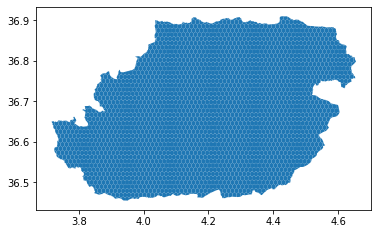

In [24]:
hex_set.plot()

Replacing missings with 0-s for visualization purposes

In [6]:
combo_set = init_combo_set.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' else x.fillna('.'))

Variables availabale for display

In [26]:
list(combo_set)

['ADM0_AR',
 'ADM0_EN',
 'ADM0_PCODE',
 'ADM1_AR',
 'ADM1_EN',
 'ADM1_PCODE',
 'ADM2ALT1AR',
 'ADM2ALT1EN',
 'ADM2ALT2AR',
 'ADM2ALT2EN',
 'ADM2_AR',
 'ADM2_EN',
 'ADM2_PCODE',
 'ADM2_REF',
 'Shape_Area',
 'Shape_Leng',
 'date',
 'hex_id',
 'hexagon_area_sq_km',
 'hexagon_area_sq_m',
 'validOn',
 'validTo',
 'pop_sum',
 'geometry',
 'osm_count',
 'carto_wvce_01_sum',
 'carto_pop_sum',
 'carto_hh_sum',
 'carto_male_sum',
 'carto_female_sum',
 'carto_age_t0014_sum',
 'carto_age_m0014_sum',
 'carto_age_f0014_sum',
 'carto_age_t1529_sum',
 'carto_age_m1529_sum',
 'carto_age_f1529_sum',
 'carto_age_t3044_sum',
 'carto_age_m3044_sum',
 'carto_age_f3044_sum',
 'carto_age_t4559_sum',
 'carto_age_m4559_sum',
 'carto_age_f4559_sum',
 'carto_age_t60pl_sum',
 'carto_age_m60pl_sum',
 'carto_age_f60pl_sum',
 'carto_di_mio_sum',
 'carto_di_pc_mean',
 'carto_di_pc_wmean',
 'carto_di_ci_mean',
 'carto_di_ci_wmean',
 'carto_staying_April_mo_sum',
 'carto_staying_December_mo_sum',
 'carto_staying_Februar

Sum of [Population]: from Worldpop

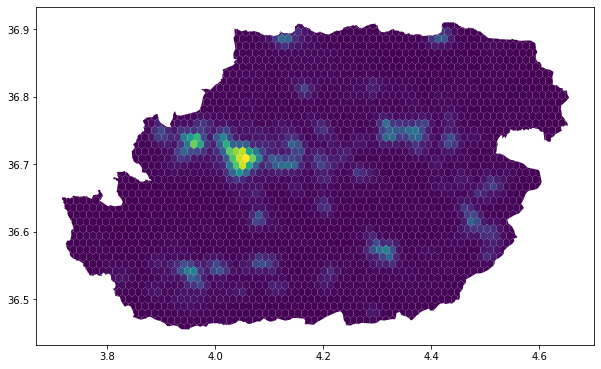

In [7]:
plot_simple_hex(combo_set, "pop_sum")

Count of [POI]: from OSM

C:\Users\Salif SAWADOGO\Anaconda3\envs\PREMIER\lib\site-packages\geopandas\plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


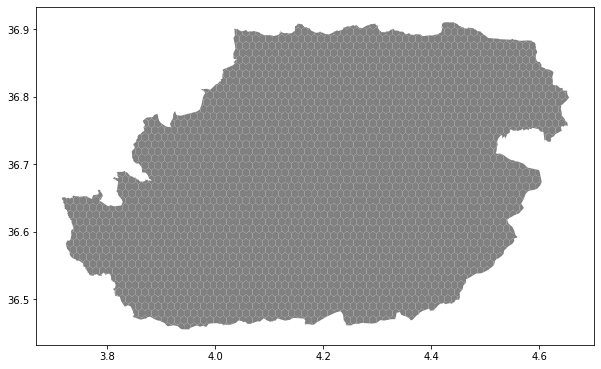

In [10]:
plot_simple_hex(combo_set, "osm_count")

Sum of [Food and Non-Alcoholic Beverages]:  from Carto

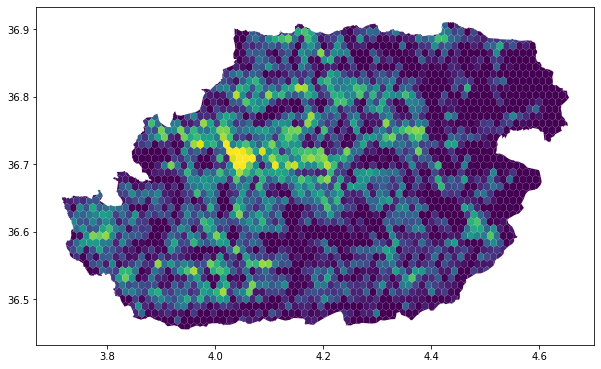

In [29]:
plot_simple_hex(combo_set,"carto_wvce_01_sum")

Sum of [Population year average, total number]: from Carto

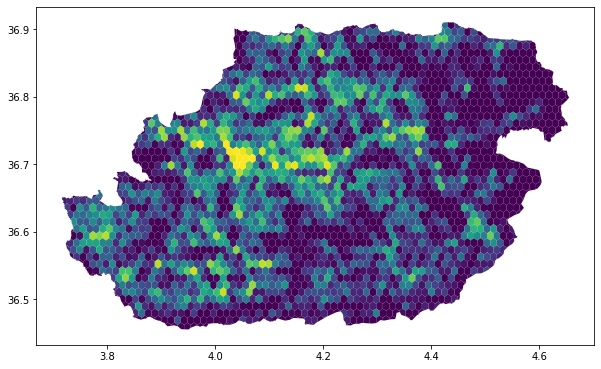

In [30]:
plot_simple_hex(combo_set, "carto_pop_sum")

Sum of [Purchasing Power, million Euro]: from Carto

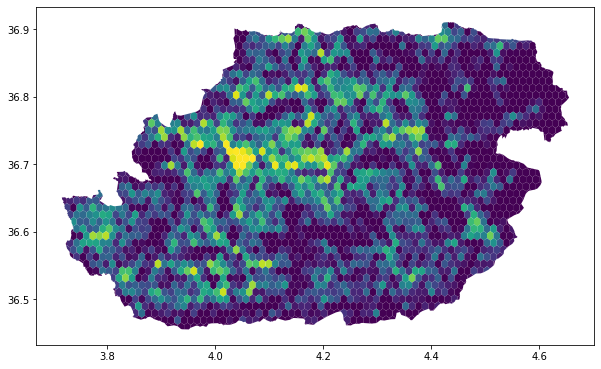

In [31]:
plot_simple_hex(combo_set,"carto_di_mio_sum")

Sum of [Unacast variable]: from Carto

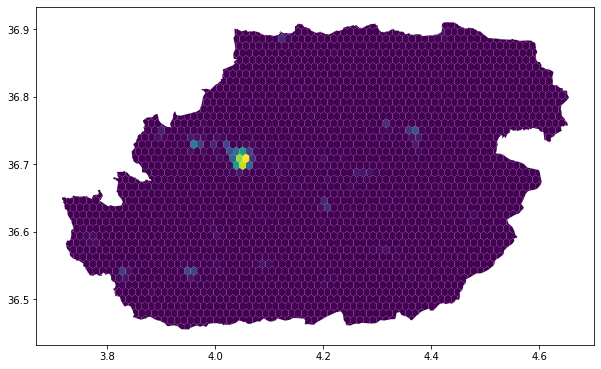

In [32]:
plot_simple_hex(combo_set,"carto_staying_April_mo_sum")